# Exercise 1

> Count the number of the lines from the files

### Modules and libraries needed

* bz2, for loading data directly from compressed file

In [1]:
import bz2

## File location

* Put the path and file names of your data to read them in Shell and Python
  
        Remember to put "/" between the folders path

In [3]:
folder_path = 'C:/Users/Pablo Villar/Desktop/CURSOS/KSchool/Máster en Data Science/8. Data Science Challenge/'
filename01 = 'bookings.csv.bz2'
filename02 = 'searches.csv.bz2'

### <strong>SHELL</strong>

With the command `bz2cat` we can "Get-Content" from the file and read it

We will use `tqdm` to see the progress bar and typed with `--bytes` to look in human the file size

>Rememeber in shell you need to stay on the path where you have the folders to execute this code

#### Linux
Utilizamos `bzcat`


In [2]:
%bzcat 'bookings.csv.bz2' | tqdm --bytes | wc -l

UsageError: Line magic function `%bzcat` not found.


#### Windows

Desde PowerShell `Get-Content` "Nombre del archivo" | Measure-Object -Line

In [1]:
%Get-Content 'bookings.csv.bz2' | Measure-Object -Line

Para ver una barra de progreso mientras se lee el archivo, puedes utilizar el cmdlet ForEach-Object en PowerShell en lugar del cmdlet Get-Content. Luego, puedes usar el módulo PSCX para mostrar una barra de progreso.

Para instalar el módulo PSCX, abre PowerShell como administrador y ejecuta el siguiente comando:

````sql

Install-Module Pscx -Scope CurrentUser
````
Una vez que hayas instalado el módulo PSCX, puedes leer el archivo y mostrar la barra de progreso con el siguiente comando:

````bash

Get-Content 'bookings.csv.bz2' -ReadCount 1000 | ForEach-Object -Process { $_ } -Begin { $ProgressPreference = 'SilentlyContinue' } -End { $ProgressPreference = 'Continue' } | Measure-Object -Line
````

Este comando divide el archivo en bloques de 1000 líneas utilizando el parámetro -ReadCount de Get-Content, luego procesa cada bloque con el cmdlet ForEach-Object. El cmdlet ForEach-Object recibe los bloques de líneas y los envía a la tubería sin procesarlos.

El parámetro -Begin de ForEach-Object establece $ProgressPreference en 'SilentlyContinue' para ocultar los mensajes de progreso, y el parámetro -End restaura el valor predeterminado de $ProgressPreference a 'Continue' para que los mensajes de progreso vuelvan a aparecer.

El cmdlet `Measure-Object` cuenta el número total de líneas en el archivo descomprimido.

*----------------------------------------------------------------------------------------------------------------------------------------------------------*

### Al lío. Vamos con el ejercicio en nuestro lenguaje preferido <strong> Python 🐍</strong>

1. Instalamos los módulos necesario
2. 

In [3]:
import pandas as pd

# bz2, for loading data directly from compressed file
import bz2

In [5]:
# Donde tenemos los datos path y nombre de archivo
# En mi caso son los siguientes
folder_path = 'C:/Users/Pablo Villar/Desktop/CURSOS/KSchool/Máster en Data Science/8. Data Science Challenge/'
filename01 = 'bookings.csv.bz2'
filename02 = 'searches.csv.bz2'

In [19]:
%%time

with bz2.open(folder_path+filename01, "r") as bookings:
    count = 0
    for line in bookings:
        count += 1
booking_count = count
print(str(booking_count) + " lines")

10000011 lines
CPU times: total: 15.8 s
Wall time: 1min 14s


In [12]:
%%time

with bz2.open(folder_path+filename02, "r") as searches:
    count = 0
    for line in searches:
        count += 1
searches_count = count
print(str(searches_count) + " lines")

20390199 lines
CPU times: total: 18.6 s
Wall time: 1min 30s


<n>Si utilizamos la función open sin la librería bz2 observamos una diferencia importante de tiempo

con el mismo resultado pero hay que decirle que "ignore errores"

porque el archivo que estamos leyendo es un "bz2" y no un archivo de texto</n>

In [18]:
%%time

with open(folder_path+filename01, mode='r', errors='ignore') as bookings:
    count=0
    for line in bookings:
        count+=1
    bookings_count = count

print(str(bookings_count) + " lines")

3691245 lines
CPU times: total: 500 ms
Wall time: 3.72 s


In [20]:
%%time

with open(folder_path+filename02, mode='r', errors='ignore') as searches:
    count=0
    for line in searches:
        count+=1
    searches_count = count

print(str(searches_count) + " lines")

3837781 lines
CPU times: total: 703 ms
Wall time: 3.57 s


Observamos que con bz2 nos llevaba minutos y solo con open segundos
>Ojo que no coinciden las líneas
`preguntar a DANI`

# Parte final

Como hemos visto que el código funciona, vamos a llevarlo a una función

In [22]:
def count_file_lines(path):
    with bz2.open(path, mode='rt') as f: # mode 'rt' for binary files
        for count,l in enumerate(f):
            pass
    return count

In [25]:
print(filename01)
print(filename02)
print(folder_path)

bookings.csv.bz2
searches.csv.bz2
C:/Users/Pablo Villar/Desktop/CURSOS/KSchool/Máster en Data Science/8. Data Science Challenge/


In [23]:
count_file_lines(folder_path+filename01)

10000010

# Espero que os haya ayudado y servido como a mí, intentadlo 😁✌️


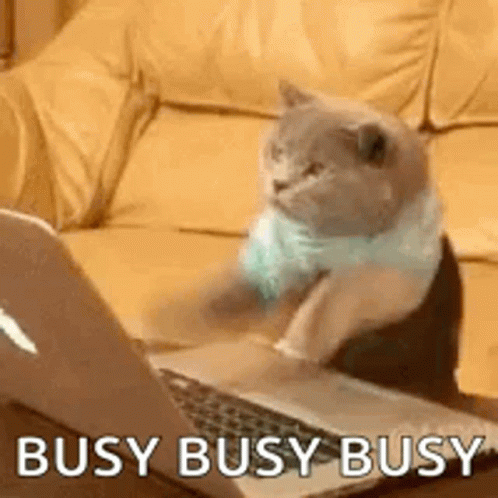
> Dudas, comentarios o sugerencias podéis preguntarme en: pablo.villardelcastillo@gmail.com